# CNN Model

### Imports

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, eval, models, train

### Initialize Dataset

In [6]:
# Constants
DATA_DIR = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
SAVE_MODEL_FILE = 'models/cnn.pt'
SEED = 0
NUM_SAMPLES = 10000
DATASET_SPLIT = [0.4, 0.3, 0.3] # Train / Valid / Test Split
BATCH_SIZE = 100
LEARN_RATE = 5e-4
EPOCHS = 20
IMAGE_SIZE = (100, 100)
WEIGHT_DECAY = 1e-3

In [15]:
# Seed PyTorch
torch.manual_seed(SEED)

# Image transforms
trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
])

# Initialize datasets
dataset = torchvision.datasets.ImageFolder(
    root=DATA_DIR,
    transform=trans
)

# Split dataset into training, validation and test sets
train_loader, valid_loader, test_loader = data.split_dataset(dataset, NUM_SAMPLES, DATASET_SPLIT, BATCH_SIZE, SEED)

# Check for CUDA GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


### Model

In [8]:
import torch.nn as nn

# Instantiate model and move to GPU if available
model = models.CNN()
model = model.to(device)

# Print model details
from torchsummary import summary
summary(model, input_size=(3, IMAGE_SIZE[0], IMAGE_SIZE[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 100, 100]             896
       BatchNorm2d-2         [-1, 32, 100, 100]              64
            Conv2d-3         [-1, 32, 100, 100]           9,248
       BatchNorm2d-4         [-1, 32, 100, 100]              64
         MaxPool2d-5           [-1, 32, 50, 50]               0
         Dropout2d-6           [-1, 32, 50, 50]               0
            Conv2d-7           [-1, 64, 50, 50]          18,496
       BatchNorm2d-8           [-1, 64, 50, 50]             128
            Conv2d-9           [-1, 64, 50, 50]          36,928
      BatchNorm2d-10           [-1, 64, 50, 50]             128
        MaxPool2d-11           [-1, 64, 25, 25]               0
        Dropout2d-12           [-1, 64, 25, 25]               0
           Conv2d-13          [-1, 128, 25, 25]          73,856
      BatchNorm2d-14          [-1, 128,

### Training

In [5]:
# Train model and save model weights and training metrics
metrics = train.train_model(model, train_loader, valid_loader, LEARN_RATE, EPOCHS, device, WEIGHT_DECAY, conv=True)
data.save_model(SAVE_MODEL_FILE, model, metrics)

Epoch 1 | Loss = 2.2266 | Train Accuracy = 39.30% | Valid Accuracy = 35.50% | Time = 0:00:28
Epoch 2 | Loss = 1.2192 | Train Accuracy = 80.40% | Valid Accuracy = 70.30% | Time = 0:00:28
Epoch 3 | Loss = 0.7569 | Train Accuracy = 90.05% | Valid Accuracy = 79.67% | Time = 0:00:28
Epoch 4 | Loss = 1.2238 | Train Accuracy = 85.92% | Valid Accuracy = 76.77% | Time = 0:00:27
Epoch 5 | Loss = 0.4791 | Train Accuracy = 93.03% | Valid Accuracy = 80.30% | Time = 0:00:28
Epoch 6 | Loss = 0.2716 | Train Accuracy = 97.70% | Valid Accuracy = 88.13% | Time = 0:00:29
Epoch 7 | Loss = 0.3582 | Train Accuracy = 93.80% | Valid Accuracy = 83.73% | Time = 0:00:27
Epoch 8 | Loss = 0.2427 | Train Accuracy = 96.75% | Valid Accuracy = 87.17% | Time = 0:00:27
Epoch 9 | Loss = 0.2190 | Train Accuracy = 98.32% | Valid Accuracy = 89.63% | Time = 0:00:28
Epoch 10 | Loss = 0.1785 | Train Accuracy = 98.67% | Valid Accuracy = 90.73% | Time = 0:00:28
Epoch 11 | Loss = 0.1546 | Train Accuracy = 99.08% | Valid Accuracy =

### Evaluation

Final Train Accuracy = 98.67%
Final Valid Accuracy  = 92.20%
Average Epoch Time   = 28.30s


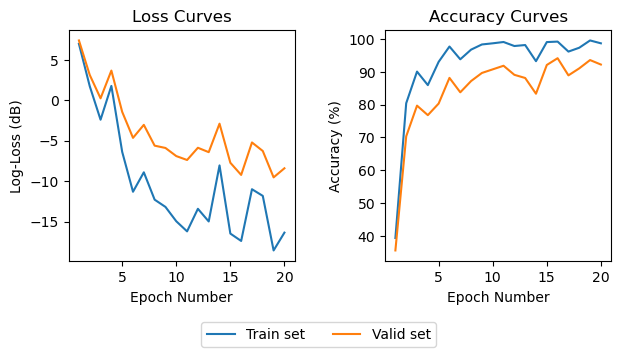

In [9]:
# Load model and show trainig and evaluation metrics
metrics = data.load_model(SAVE_MODEL_FILE, model)
eval.plot_metrics(metrics)

Precision = 0.8917
Recall = 0.8553
F1 = 0.8657
Accuracy = 85.53%


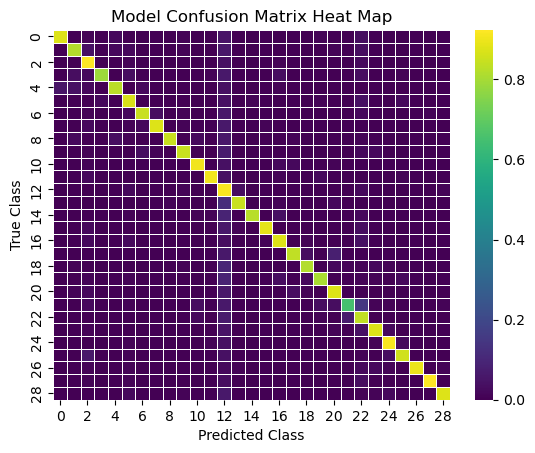

In [16]:
eval_metrics = eval.eval_model(model, test_loader, device, conv=True)